# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [63]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clusters_8,clusters_5,clusters_3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,4,3,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,4,3,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,6,3,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,3,2,0


In [64]:
from sklearn.preprocessing import StandardScaler

# Your code here:

scale = StandardScaler()

scale.fit(X)

X_scale = pd.DataFrame(scale.transform(X), columns = X.columns)

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X_scale)
X_scale["clusters_8"] = kmeans.labels_

In [67]:
silhouette_score(X_scale, labels=X_scale.clusters_8)

0.262042930421066

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [68]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scale)
X_scale["clusters_5"] = kmeans.labels_
silhouette_score(X_scale, labels=X_scale.clusters_5)

0.3421261088810499

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [69]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scale)
X_scale["clusters_3"] = kmeans.labels_
silhouette_score(X_scale, labels=X_scale.clusters_3)

0.28454440694782557

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [28]:
import yellowbrick
from yellowbrick.cluster.elbow import kelbow_visualizer

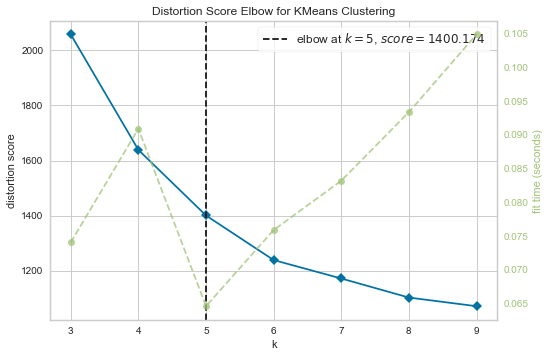

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)>

In [70]:
model = kelbow_visualizer(KMeans(), X_scale, k=(3,10), metrics = 'distortion')
model.show

# The optimun number of clusters us 5

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

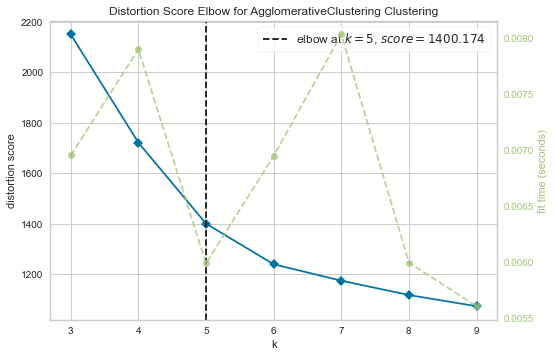

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)>

In [71]:
from sklearn.cluster import AgglomerativeClustering

model = kelbow_visualizer(AgglomerativeClustering(), X_scale, k=(3,10), metrics = 'distortion')
model.show

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [59]:
import seaborn as sns

In [124]:
X_scale.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'clusters_8', 'clusters_5',
       'clusters_3', 'target'],
      dtype='object')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clusters_8,clusters_5,clusters_3,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,6,0,2,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,6,0,2,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,6,0,2,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2,4,0,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,7,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,5,3,1,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,5,3,1,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1,2,1,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1,2,1,2


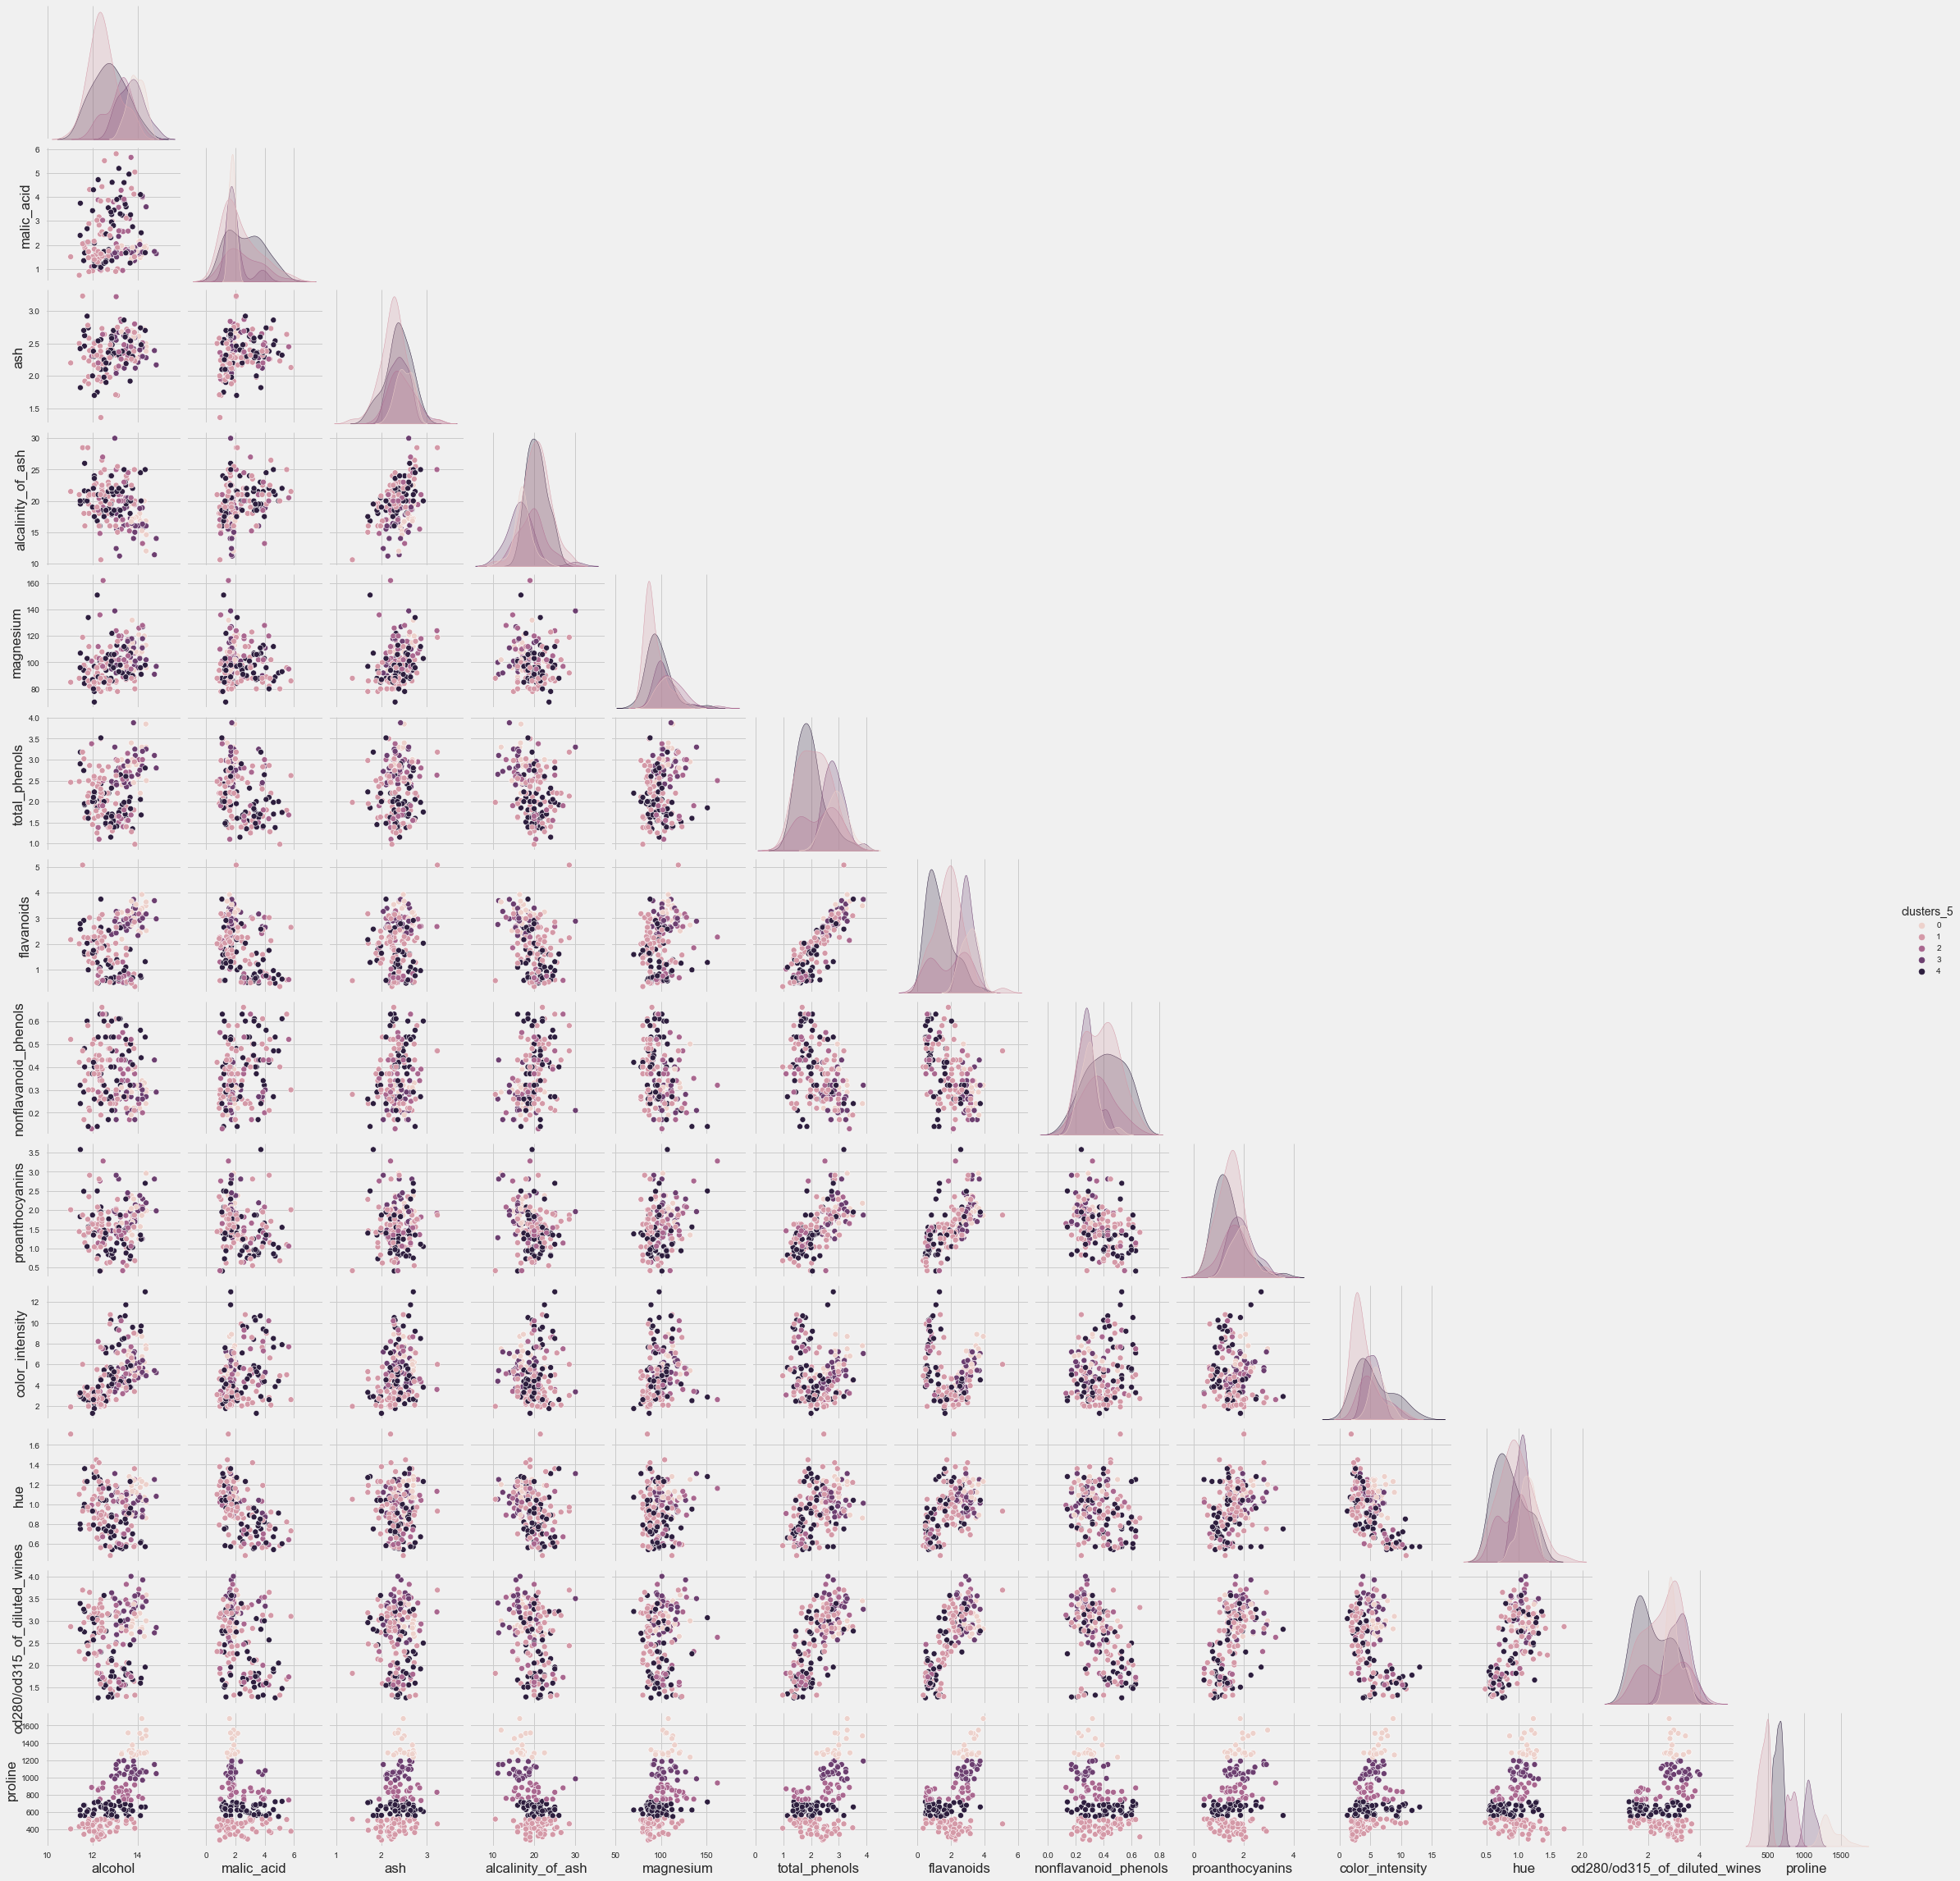

In [131]:
sns.pairplot(X, hue="clusters_5", corner = True)

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [136]:
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline

In [137]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [138]:
pca = pca_pipeline.named_steps['pca']
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [56]:
from sklearn.manifold import TSNE

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


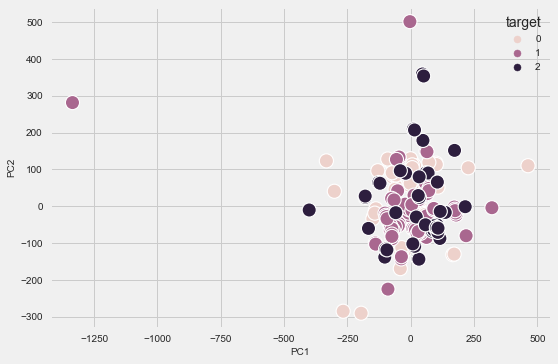

In [144]:
tsne = TSNE(n_components=2, perplexity = 0.5 )
transformed_X = tsne.fit_transform(X_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data["target"] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='target', s= 200)
plt.xlabel('PC1', size=10)
plt.ylabel('PC2', size=10)
plt.show()

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


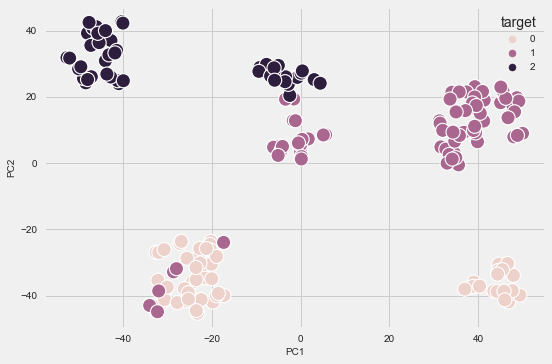

In [145]:
tsne = TSNE(n_components=2, perplexity = 5 )
transformed_X = tsne.fit_transform(X_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data["target"] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='target', s= 200)
plt.xlabel('PC1', size=10)
plt.ylabel('PC2', size=10)
plt.show()

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


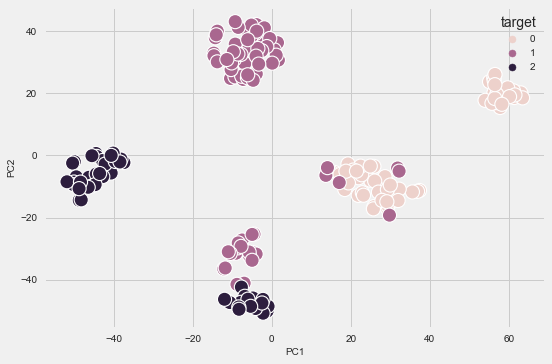

In [147]:
tsne = TSNE(n_components=2, perplexity = 7 )
transformed_X = tsne.fit_transform(X_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data["target"] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='target', s= 200)
plt.xlabel('PC1', size=10)
plt.ylabel('PC2', size=10)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity = 9. )
transformed_X = tsne.fit_transform(X_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data["target"] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='target', s= 200)
plt.xlabel('PC1', size=10)
plt.ylabel('PC2', size=10)
plt.show()

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


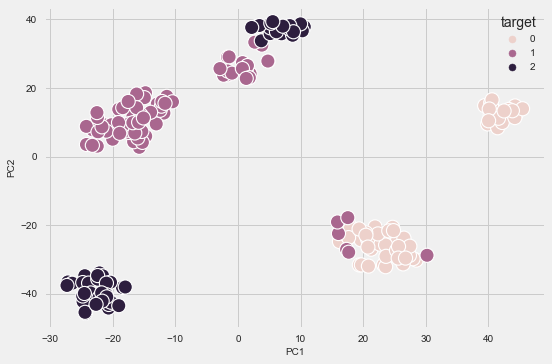

In [146]:
tsne = TSNE(n_components=2, perplexity = 10 )
transformed_X = tsne.fit_transform(X_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data["target"] = y


sns.scatterplot('PC1', 'PC2', data=data, hue='target', s= 200)
plt.xlabel('PC1', size=10)
plt.ylabel('PC2', size=10)
plt.show()